In [8]:
import wfdb #WaveForm-Database package. A library of tools for reading, writing, and processing WFDB signals and annotations.
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import csv
import gc

In [9]:
from os import walk
_, _, filenames = next(walk('../../data/origin/healthy_patients/5kHz'))

In [10]:
df = pd.DataFrame(filenames)

In [12]:
df[0] = df[0].str.replace(r'(\d+).\S+',r'\1',regex=True)

In [13]:
df.drop_duplicates(0,inplace = True)

In [14]:
df = df.loc[df[0].str.startswith('b')].copy()

In [15]:
for item in df[0]:
    record = wfdb.rdsamp(f'../../data/origin/healthy_patients/5kHz/{item}')
    record=np.asarray(record[0])
    to_save = pd.DataFrame(record)
    to_save.rename(columns = {0 : 'ecg_1', 1 : 'ecg_2', 2 : 'rate', 3 : 'seismogram'},inplace = True)
    to_save.to_csv(f'../../data/raw/healthy_patients/5khz/{item}.txt',sep=';')

In [16]:
df

,0
0,b001
3,b002
6,b003
9,b004
12,b005
15,b006
18,b007
21,b008
24,b009
27,b010


In [18]:
lista_nomes = df[0]

In [25]:
for filename in lista_nomes:
    
    plot = pd.read_csv(f'../../data/raw/healthy_patients/5khz/{filename}.txt',sep=';')
    plot.drop(columns = 'Unnamed: 0',inplace = True)
    plot['time'] = (plot.index + 1) * 0.0002
    
    i = 0
    for i in range(int(plot.shape[0] / 25000)):
        row_min = int(i * 25000)
        row_max = int((i + 1) * 25000)
        time_min = int(row_min * 0.0002)
        time_max = int(row_max * 0.0002)
        plt.figure(figsize=[20,10])
        line_plot = sns.lineplot(data = plot.iloc[row_min:row_max],x='time',y='ecg_1')
        fig = line_plot.get_figure()
        fig.savefig(f'../../data/interim/train_data/healthy_patients/{filename}_{time_min}s-{time_max}s.png')
        plt.close(fig)
        if (i == int(plot.shape[0] * 0.1)) or (i == int(plot.shape[0] * 0.2)) or (i == int(plot.shape[0] * 0.3))\
        or (i == int(plot.shape[0] * 0.4)) or (i == int(plot.shape[0] * 0.5)) or (i == int(plot.shape[0] * 0.6))\
        or (i == int(plot.shape[0] * 0.7)) or (i == int(plot.shape[0] * 0.8)) or (i == int(plot.shape[0] * 0.9))\
        or (i == plot.shape[0] - 1):
            gc.collect()
            print('Garbage Collected')

In [28]:
record = wfdb.rdsamp('../../data/origin/healthy_patients/b001')

In [29]:
record=np.asarray(record[0])

In [30]:
df = pd.DataFrame(record)

In [31]:
df

,0,1,2,3
0,0.162980,0.183717,0.525201,-0.183137
1,0.162683,0.183717,0.525201,-0.183137
2,0.162683,0.184022,0.525201,-0.183137
3,0.162683,0.184326,0.525201,-0.183137
4,0.162683,0.184631,0.525201,-0.183137
...,...,...,...,...
1360045,0.040597,-0.313108,0.554799,-4.913435
1360046,0.032056,-0.308221,0.554505,-4.943891
1360047,0.024109,-0.303334,0.554505,-4.974346
1360048,0.016488,-0.298156,0.554505,-5.004801


In [33]:
df.rename(columns = {0 : 'ecg_1', 1 : 'ecg_2', 2 : 'rate', 3 : 'seismogram'},inplace = True)

In [34]:
df

,ecg_1,ecg_2,rate,seismogram
0,0.162980,0.183717,0.525201,-0.183137
1,0.162683,0.183717,0.525201,-0.183137
2,0.162683,0.184022,0.525201,-0.183137
3,0.162683,0.184326,0.525201,-0.183137
4,0.162683,0.184631,0.525201,-0.183137
...,...,...,...,...
1360045,0.040597,-0.313108,0.554799,-4.913435
1360046,0.032056,-0.308221,0.554505,-4.943891
1360047,0.024109,-0.303334,0.554505,-4.974346
1360048,0.016488,-0.298156,0.554505,-5.004801


In [36]:
df.to_csv('../../data/raw/healthy_patients/b001.txt',sep=';')

In [22]:
to_plot = df.iloc[0:10000]

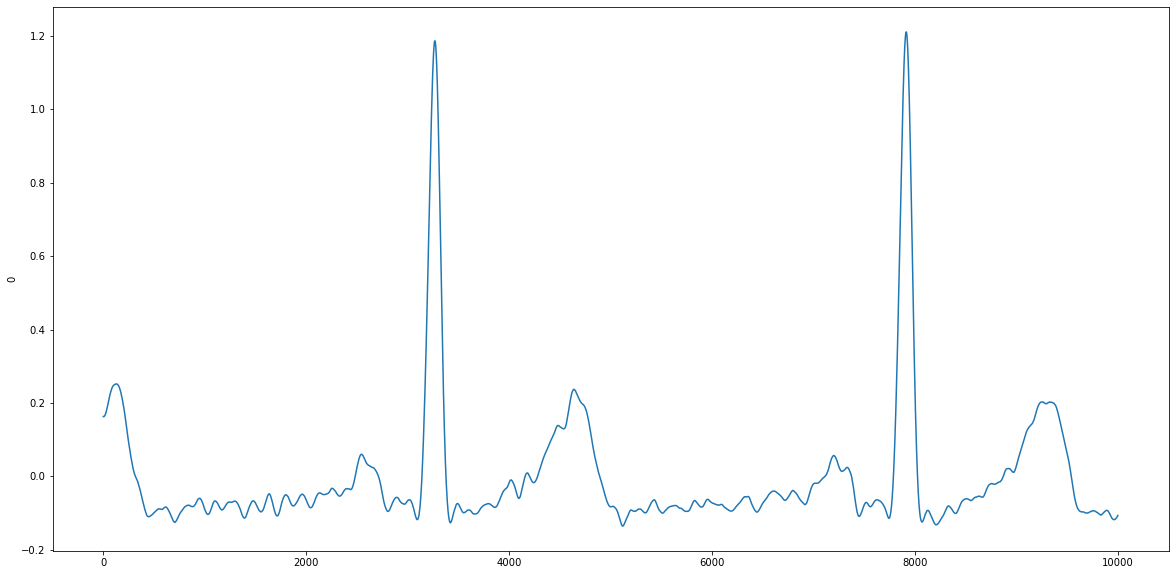

In [28]:
plt.figure(figsize=[20,10])
sns.lineplot(x=to_plot.index,y=to_plot[0])
plt.show()

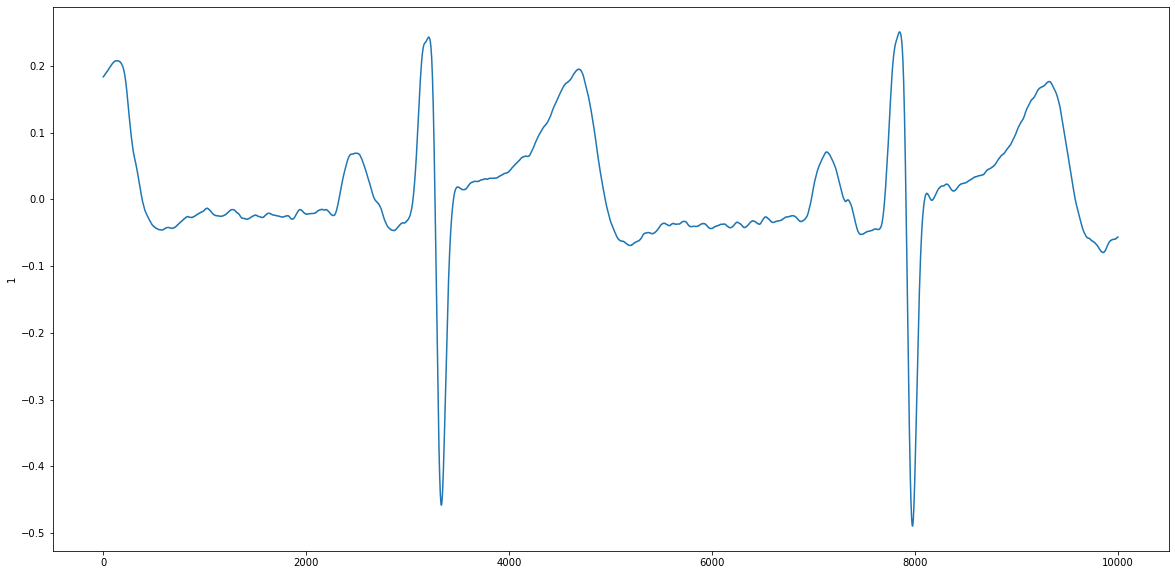

In [29]:
plt.figure(figsize=[20,10])
sns.lineplot(x=to_plot.index,y=to_plot[1])
plt.show()

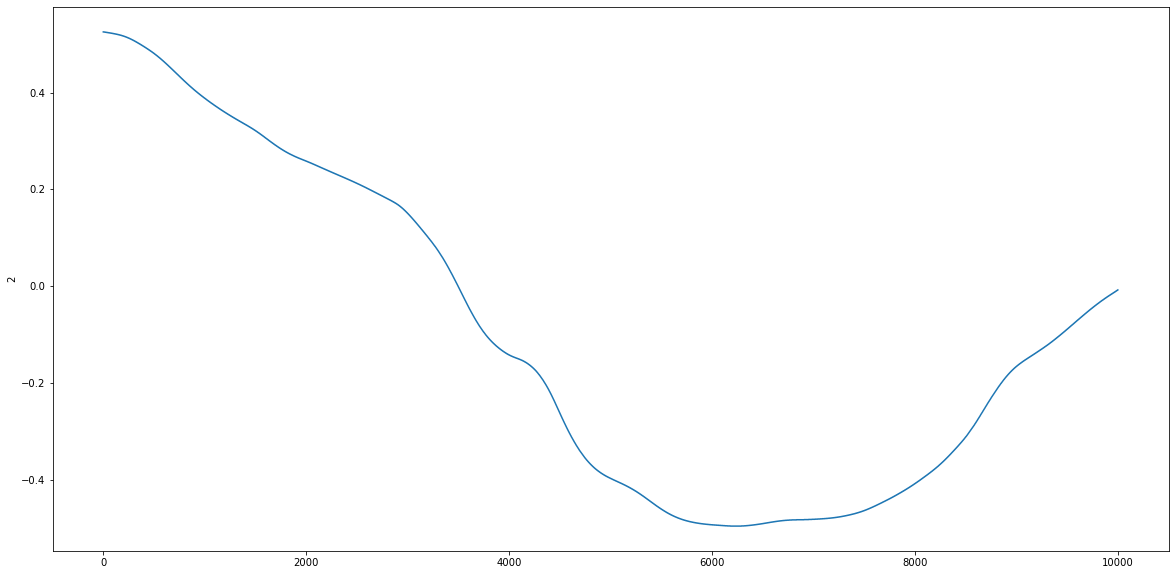

In [30]:
plt.figure(figsize=[20,10])
sns.lineplot(x=to_plot.index,y=to_plot[2])
plt.show()

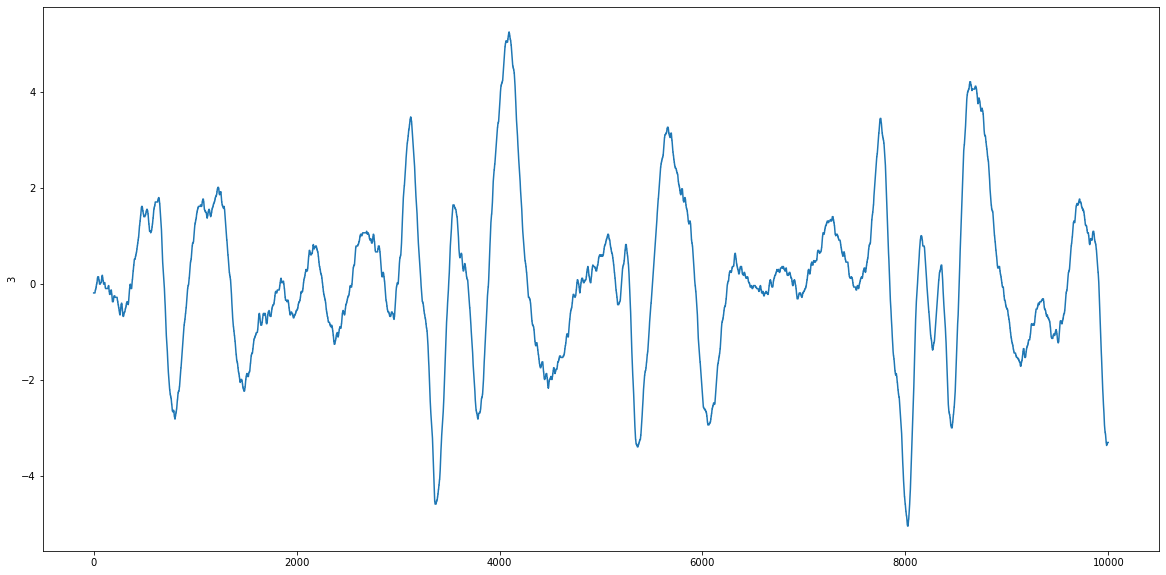

In [31]:
plt.figure(figsize=[20,10])
sns.lineplot(x=to_plot.index,y=to_plot[3])
plt.show()

In [2]:
df = pd.read_csv('holter_list.csv',sep=',')

In [3]:
df

,Signals,Header,Unaudited,Audited,Signal,VF Onset
0,30.dat,30.hea,30.ari,30.atr,24:33:17,07:54:33
1,31.dat,31.hea,31.ari,31.atr,13:58:40,13:42:24
2,32.dat,32.hea,32.ari,32.atr,24:20:00,16:45:18
3,33.dat,33.hea,33.ari,NaN,24:33:00,04:46:19
4,34.dat,34.hea,34.ari,34.atr,07:05:20,06:35:44
5,35.dat,35.hea,35.ari,35.atr,24:52:00,24:34:56
6,36.dat,36.hea,36.ari,36.atr,20:21:20,18:59:01
7,37.dat,37.hea,37.ari,NaN,25:08:00,01:31:13
8,38.dat,38.hea,38.ari,NaN,18:18:25,08:01:54
9,39.dat,39.hea,39.ari,NaN,05:47:00,04:37:51


In [4]:
df['filename'] = df['Signals'].str.replace(r'(\S+).dat',r'\1',regex=True) + '.txt'

In [5]:
df['signal_time'] = (df['Signal'].str.replace(r'(\S+):(\S+):(\S+)',r'\1',regex=True).astype(int) * 3600\
                    + df['Signal'].str.replace(r'(\S+):(\S+):(\S+)',r'\2',regex=True).astype(int) * 60\
                    + df['Signal'].str.replace(r'(\S+):(\S+):(\S+)',r'\3',regex=True).astype(int)) * 250

In [6]:
df['ventricular_fibrilation'] = (df['VF Onset'].str.replace(r'(\S+):(\S+):(\S+)',r'\1',regex=True).astype(int) * 3600\
                    + df['VF Onset'].str.replace(r'(\S+):(\S+):(\S+)',r'\2',regex=True).astype(int) * 60\
                    + df['VF Onset'].str.replace(r'(\S+):(\S+):(\S+)',r'\3',regex=True).astype(int)) * 250

In [7]:
df.drop(columns = ['Signals','Header','Unaudited','Audited','Signal','VF Onset'],inplace = True)

In [8]:
df

,filename,signal_time,ventricular_fibrilation
0,30.txt,22099250,7118250
1,31.txt,12580000,12336000
2,32.txt,21900000,15079500
3,33.txt,22095000,4294750
4,34.txt,6380000,5936000
5,35.txt,22380000,22124000
6,36.txt,18320000,17085250
7,37.txt,22620000,1368250
8,38.txt,16476250,7228500
9,39.txt,5205000,4167750


In [9]:
df['ventricular_fibrilation'] / 1250

0      5694.6
1      9868.8
2     12063.6
3      3435.8
4      4748.8
5     17699.2
6     13668.2
7      1094.6
8      5782.8
9      3334.2
10        0.0
11     2152.8
12        0.0
13    11246.2
14    14145.0
15    13071.4
16     2661.4
17     4476.2
18     1796.0
19        0.0
20     8468.6
21    16540.6
22     1832.0
Name: ventricular_fibrilation, dtype: float64

In [10]:
df['image_number'] = np.ceil(df['ventricular_fibrilation'] / 1250)

In [11]:
df['image_number'].sum()

153789.0

In [17]:
lista_filenames = list(df['filename'].unique())

In [18]:
lista_filenames.remove('30.txt')


In [19]:
lista_filenames.remove('34.txt')

In [20]:
lista_filenames.remove('31.txt')
lista_filenames.remove('32.txt')
lista_filenames.remove('33.txt')
lista_filenames.remove('40.txt')
lista_filenames.remove('42.txt')
lista_filenames.remove('49.txt')
lista_filenames.remove('35.txt')
lista_filenames.remove('36.txt')
lista_filenames.remove('37.txt')
lista_filenames.remove('38.txt')
lista_filenames.remove('39.txt')
lista_filenames.remove('41.txt')
lista_filenames.remove('43.txt')
lista_filenames.remove('44.txt')
lista_filenames.remove('45.txt')
lista_filenames.remove('46.txt')
lista_filenames.remove('47.txt')
lista_filenames.remove('48.txt')
lista_filenames.remove('50.txt')
lista_filenames.remove('51.txt')
lista_filenames.remove('51.txt')

In [21]:
lista_filenames

['52.txt']

In [22]:
for filename in lista_filenames:
    
    plot = pd.read_csv(f'../../data/raw/{filename}',sep=';')
    plot.drop(columns = 'Unnamed: 0',inplace = True)
    plot['time'] = (plot.index + 1) * 0.004
    i = 0
    total_length= int(df.loc[df['filename'] == filename,'image_number'].values[0])
    
    for i in range(total_length):
        row_min = int(i * 1250)
        row_max = int((i + 1) * 1250)
        time_min = int(row_min * 0.004)
        time_max = int(row_max * 0.004)
        plt.figure(figsize=[20,10])
        line_plot = sns.lineplot(data = plot.iloc[row_min:row_max],x='time',y='0')
        fig = line_plot.get_figure()
        fig.savefig(f'../../data/interim/{filename}_{time_min}s-{time_max}s.png')
        plt.close(fig)
        if (i == int(total_length * 0.1)) or (i == int(total_length * 0.2)) or (i == int(total_length * 0.3))\
        or (i == int(total_length * 0.4)) or (i == int(total_length * 0.5)) or (i == int(total_length * 0.6))\
        or (i == int(total_length * 0.7)) or (i == int(total_length * 0.8)) or (i == int(total_length * 0.9))\
        or (i == total_length - 1):
            gc.collect()
            print('Garbage Collected')

Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
